In [1]:
## Weining Nico ZHENG for the HKUST Python Test 20190729
## Python Version 3.6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 1:Data Processing

## 1.1. List the top 10 tracks in the global throughout year 2017 with their total stream counts.


In [2]:
# data read-in (put it in the same folder of this code)
df = pd.read_csv("data.csv")
df_2017 = df[(df['Date'] <'2018')&(df['Date'] >='2017') ] #Sort for the stream in 2017
df_2017_top10 = df_2017.groupby(['Track Name']).sum().sort_values(by=['Streams'],ascending=False).iloc[:10]
df_2017_top10

,Position,Streams
Track Name,,
Shape of You,288124,2954314942
Despacito - Remix,448910,1808988398
Despacito (Featuring Daddy Yankee),786506,1449083311
Something Just Like This,692088,1366414897
Unforgettable,694915,1341220672
HUMBLE.,821601,1288359986
I'm the One,522258,1241605052
rockstar,118844,1186411578
It Ain't Me (with Selena Gomez),829633,1179203261


## 1.2.List the top 10 artists (or groups) those has the most stream counts for all their tracks combined, with the stream counts of each of their tracks.

In [4]:
# Top 10 Artist with their stream counts for all their tracks
df_artist_alltop10 = df.groupby(['Artist']).sum().sort_values(by=['Streams'],ascending=False).iloc[:10]
df_artist_alltop10

,Position,Streams
Artist,,
Ed Sheeran,10534351,8913973976
Drake,4679189,4523630992
The Chainsmokers,5304084,4292590087
Post Malone,2466648,3700404149
Kendrick Lamar,2471880,3570665303
Luis Fonsi,1442101,3555514919
J Balvin,1986826,2494735971
Calvin Harris,3110608,2397708371
Imagine Dragons,2727838,2322921399


In [5]:
# The list of top 10 artists (or groups) those has the most stream counts for all their tracks
top10_Artist = list(df_artist_alltop10.index)

# Top 10 Artists with the stream counts of each of their tracks.
# This table is sorted by their stream counts. 
df_track_top10Artist = df[df['Artist'].isin(top10_Artist)].groupby(['Artist','Track Name']).sum().sort_values(by=['Streams'],ascending=False)
df_track_top10Artist

Position  \
Artist           Track Name                                                     
Ed Sheeran       Shape of You                                          301513   
Luis Fonsi       Despacito - Remix                                     477232   
                 Despacito (Featuring Daddy Yankee)                    816152   
The Chainsmokers Something Just Like This                              725122   
Kendrick Lamar   HUMBLE.                                               854060   
Post Malone      rockstar                                              127973   
DJ Khaled        I'm the One                                           548303   
J Balvin         Mi Gente                                              328826   
Post Malone      Congratulations                                      1045037   
Imagine Dragons  Thunder                                               624701   
                 Believer                                             1124683   
Ed Sheeran       Perfect                                               897147   
The Chainsmokers Paris                                                 854958   
Ed Sheeran       Castle on the Hill                                    889667   
The Chainsmokers Closer                                               1110432   
DJ Khaled        Wild Thoughts                                         492755   
Ed Sheeran       Galway Girl                                           783989   
Calvin Harris    Feels                                                 496453   
Drake            Passionfruit                                          596085   
Calvin Harris    Slide                                                 696143   
Drake            One Dance                                            1163853   
Kendrick Lamar   DNA.                                                  437885   
Drake            Fake Love                                             576735   
Ed Sheeran       Photograph                                           1525708   
Post Malone      I Fall Apart                                          235648   
Kendrick Lamar   LOVE. FEAT. ZACARI.                                   233308   
J Balvin         Bonita                                                134967   
The Chainsmokers Don't Let Me Down                                    1251408   
Ed Sheeran       Happier                                               735015   
                 Thinking Out Loud                                    1604987   
...                                                                       ...   
                 Touch and Go                                             832   
Imagine Dragons  Whatever It Takes - Jorgen Odegard Remix                 303   
Ed Sheeran       She                                                      893   
                 English Rose                                             903   
                 All Of The Stars                                         645   
The Chainsmokers Something Just Like This - Dimitri Vegas & Like...       743   
J Balvin         Hey Ma (with J Balvin & Pitbull feat. Camila Ca...       659   
Ed Sheeran       Afire Love                                               454   
Drake            Energy                                                   459   
Imagine Dragons  Shots - Broiler Remix                                   1140   
Ed Sheeran       Firefly                                                  482   
The Chainsmokers Until You Were Gone                                      746   
Ed Sheeran       Little Lady - Mikill Pane                                332   
                 Fire Alarms                                              344   
Calvin Harris    Summer                                                   389   
Drake            Hold On, We're Going Home                                303   
                 Started From the Bottom                                  332   
                 Fe

In [7]:
# Another way of sorting it
df_track_top10Artist_byArtist = df_track_top10Artist
df_track_top10Artist_byArtist.reset_index(inplace=True)  
df_track_top10Artist_byArtist = pd.merge(pd.DataFrame(top10_Artist,columns=['Artist']),df_track_top10Artist_byArtist,how='inner',on = 'Artist')
df_track_top10Artist_byArtist[['Artist','Track Name','Streams']]

,Artist,Track Name,Streams
0,Ed Sheeran,Shape of You,2993988783
1,Ed Sheeran,Perfect,1008408812
2,Ed Sheeran,Castle on the Hill,950641030
3,Ed Sheeran,Galway Girl,895638000
4,Ed Sheeran,Photograph,441132246
5,Ed Sheeran,Happier,396550634
6,Ed Sheeran,Thinking Out Loud,378317823
7,Ed Sheeran,Dive,250391699
8,Ed Sheeran,Perfect Duet (Ed Sheeran & Beyoncé),211662492
9,Ed Sheeran,What Do I Know?,184236454


## 1.3.List the top 10 tracks in December, 2017 for each continent (North America, Europe, Asia, South America, Oceania).
You may need this extra data for mapping countries to continents.


In [11]:
# December, 2017
df_201712 = df [(df['Date']>'2017-11')&(df['Date']<'2018')].reset_index()
df_201712

,index,Position,Track Name,Artist,Streams,URL,Date,Region
0,60200,1,Criminal,Natti Natasha,20958,https://open.spotify.com/track/2SmgFAhQkQCQPyB...,2017-11-01,ec
1,60201,2,Mayores,Becky G,20870,https://open.spotify.com/track/7JNh1cfm0eXjqFV...,2017-11-01,ec
2,60202,3,Robarte un Beso,Carlos Vives,20543,https://open.spotify.com/track/4z3GJkrtH97Bj6f...,2017-11-01,ec
3,60203,4,Suena El Dembow,Joey Montana,19537,https://open.spotify.com/track/5TysCiZtv1HnSWc...,2017-11-01,ec
4,60204,5,Se Preparó,Ozuna,18001,https://open.spotify.com/track/1m69ELEgE6k5ZWs...,2017-11-01,ec
5,60205,6,Que Va,Alex Sensation,17805,https://open.spotify.com/track/7ofxPmTNMj2GP07...,2017-11-01,ec
6,60206,7,Me Rehúso,Danny Ocean,15993,https://open.spotify.com/track/6De0lHrwBfPfrho...,2017-11-01,ec
7,60207,8,Besame,Valentino,15694,https://open.spotify.com/track/7Ckhk1XW5NV2k4j...,2017-11-01,ec
8,60208,9,Báilame - Remix,Nacho,15610,https://open.spotify.com/track/3VClLWqNn80Llv0...,2017-11-01,ec
9,60209,10,Perro Fiel,Shakira,14885,https://open.spotify.com/track/70lnL3QaSOIIyMa...,2017-11-01,ec


In [12]:
# Country Code here
df_201712 ['Region'].unique()

array(['ec', 'fr', 'ar', 'fi', 'no', 'it', 'lt', 'ph', 'tw', 'nz', 'ee',
       'tr', 'us', 'sv', 'cr', 'de', 'cl', 'jp', 'br', 'hn', 'gt', 'ch',
       'hu', 'ca', 'pe', 'be', 'my', 'dk', 'bo', 'pl', 'at', 'pt', 'se',
       'mx', 'pa', 'uy', 'is', 'es', 'cz', 'ie', 'nl', 'sk', 'co', 'sg',
       'id', 'do', 'lu', 'gb', 'global', 'py', 'au', 'lv', 'gr', 'hk'],
      dtype=object)

We can see there are 54 countries with their codes showing above, we still need an external table to know which continent it is in. The link I downloaded the data set of country code and the continent is listed below. Meanwhile, its summarization is shown below. <br>
Country and Continent Codes List:https://datahub.io/JohnSnowLabs/country-and-continent-codes-list#data

In [13]:
import urllib
import csv
# Download at the same path as the code file
url = 'https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv'
urllib.request.urlretrieve(url, "country-and-continent-codes-list-csv_csv.csv")
# See the summary of this data set
ref_countryCode = pd.read_csv("country-and-continent-codes-list-csv_csv.csv")
ref_countryCode.groupby("Continent_Name").count()

,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
Continent_Name,,,,,
Africa,58,58,57,58,58
Antarctica,5,5,5,5,5
Asia,58,58,58,55,55
Europe,57,57,57,57,57
North America,0,43,43,43,43
Oceania,27,27,27,26,26
South America,14,14,14,14,14


In [14]:
# Transform the Country Code into Lower-Case  
ref_countryCode = ref_countryCode.loc[:,'Continent_Name':'Two_Letter_Country_Code':3]
ref_countryCode['Two_Letter_Country_Code'] = ref_countryCode['Two_Letter_Country_Code'].str.lower()
# Merge the two data set
df_201712_continent = pd.merge(df_201712,ref_countryCode,how='left',left_on='Region',right_on='Two_Letter_Country_Code' )
df_201712_continent

,index,Position,Track Name,Artist,Streams,URL,Date,Region,Continent_Name,Two_Letter_Country_Code
0,60200,1,Criminal,Natti Natasha,20958,https://open.spotify.com/track/2SmgFAhQkQCQPyB...,2017-11-01,ec,South America,ec
1,60201,2,Mayores,Becky G,20870,https://open.spotify.com/track/7JNh1cfm0eXjqFV...,2017-11-01,ec,South America,ec
2,60202,3,Robarte un Beso,Carlos Vives,20543,https://open.spotify.com/track/4z3GJkrtH97Bj6f...,2017-11-01,ec,South America,ec
3,60203,4,Suena El Dembow,Joey Montana,19537,https://open.spotify.com/track/5TysCiZtv1HnSWc...,2017-11-01,ec,South America,ec
4,60204,5,Se Preparó,Ozuna,18001,https://open.spotify.com/track/1m69ELEgE6k5ZWs...,2017-11-01,ec,South America,ec
5,60205,6,Que Va,Alex Sensation,17805,https://open.spotify.com/track/7ofxPmTNMj2GP07...,2017-11-01,ec,South America,ec
6,60206,7,Me Rehúso,Danny Ocean,15993,https://open.spotify.com/track/6De0lHrwBfPfrho...,2017-11-01,ec,South America,ec
7,60207,8,Besame,Valentino,15694,https://open.spotify.com/track/7Ckhk1XW5NV2k4j...,2017-11-01,ec,South America,ec
8,60208,9,Báilame - Remix,Nacho,15610,https://open.spotify.com/track/3VClLWqNn80Llv0...,2017-11-01,ec,South America,ec
9,60209,10,Perro Fiel,Shakira,14885,https://open.spotify.com/track/70lnL3QaSOIIyMa...,2017-11-01,ec,South America,ec


In [15]:
# Print the Top 10 Track Name and Stream Counts for Each Continent
continent_list = ['North America', 'Europe', 'Asia', 'South America', 'Oceania']
for c in continent_list:
    print("The Top 10 Tracks and their stream counts in December, 2017 for "+c+" is: ")
    print(df_201712_continent[df_201712_continent['Continent_Name']==c].groupby(['Track Name']).sum().sort_values(by=['Streams'],ascending=False).iloc[:10]['Streams'])
    print()

The Top 10 Tracks and their stream counts in December, 2017 for North America is: 
Track Name
rockstar                           136477687
Gucci Gang                          88677585
Havana                              74875780
I Fall Apart                        67412523
Too Good At Goodbyes                63351702
Wolves                              59415657
Ric Flair Drip (& Metro Boomin)     58893930
No Limit                            58409762
New Rules                           57815649
Perfect                             56530751
Name: Streams, dtype: int64

The Top 10 Tracks and their stream counts in December, 2017 for Europe is: 
Track Name
rockstar                       122721170
Havana                         103857343
New Rules                       80287030
Wolves                          78102292
Perfect                         77067170
Let You Down                    77000899
Dusk Till Dawn - Radio Edit     75271036
Silence                         70227873
Too Good At 

## 1.4.Plot the ranking changes of the Ed Sheeran's "Shape of You" alongside with the stream count changes.

I plot both the global ranking changes and the ranking changes of each continent. <BR>
Here is the plot of the global ranking changes.

In [16]:
# The stream counts and ranking of different combination of [artist, track name]
df_streams_byTrackArtistDate = df.groupby(['Artist','Track Name','Date']).aggregate(np.sum)
df_streams_byTrackArtistDate.reset_index(inplace=True)  
df_streams_byTrackArtistDate['Stream Rank'] = df_streams_byTrackArtistDate[['Streams']].groupby(df_streams_byTrackArtistDate['Date'])['Streams'].rank(method='min',ascending=False)
# The stream counts and ranking of "Shape of You" by the Ed Sheeran
df_streams_shapeOfYou_Ed = df_streams_byTrackArtistDate[(df_streams_byTrackArtistDate['Artist']=='Ed Sheeran')&(df_streams_byTrackArtistDate['Track Name']=='Shape of You')][['Date','Streams','Stream Rank']].reset_index()
df_streams_shapeOfYou_Ed

,index,Date,Streams,Stream Rank
0,226432,2017-01-06,12287078,1.0
1,226433,2017-01-07,13190270,1.0
2,226434,2017-01-08,13099919,1.0
3,226435,2017-01-09,14506351,1.0
4,226436,2017-01-10,14275628,1.0
5,226437,2017-01-11,14372699,1.0
6,226438,2017-01-12,14148108,1.0
7,226439,2017-01-13,14536236,1.0
8,226440,2017-01-14,14173311,1.0
9,226441,2017-01-15,12889849,1.0


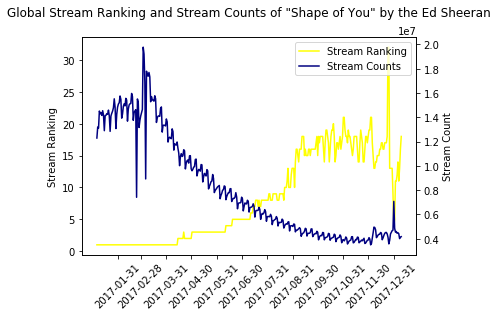

In [24]:
import matplotlib.dates as mdate
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Stream Ranking')
l1 = ax1.plot(df_streams_shapeOfYou_Ed['Date'],df_streams_shapeOfYou_Ed['Stream Rank'],c='yellow', label='Stream Ranking')
ax2=ax1.twinx() 
l2 = ax2.plot(df_streams_shapeOfYou_Ed['Date'],df_streams_shapeOfYou_Ed['Streams'],c='navy', label='Stream Counts')

#To make the legend together
lines = l1+l2
labels = [l.get_label() for l in lines]
plt.legend(lines,labels, loc = 0)

# x-axis
df_streams_shapeOfYou_Ed['Date'] = pd.to_datetime(df_streams_shapeOfYou_Ed['Date'])
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))#Setting date format for x-axis
plt.xticks(pd.date_range(df_streams_shapeOfYou_Ed['Date'].iloc[0],df_streams_shapeOfYou_Ed['Date'].iloc[-1],freq='M'))
ax1.xaxis.set_tick_params(rotation=45)
ax2.set_ylabel('Stream Count')
plt.xlabel(u'Date')
plt.title('Global Stream Ranking and Stream Counts of "Shape of You" by the Ed Sheeran\n')
plt.show()

Here is the plot of the ranking changes in each continent. We can use this method to analyze the ranking changes in different regions as well.

In [26]:
# To merge with the continent data
df_byContinent = pd.merge(df,ref_countryCode,how='left',left_on='Region',right_on='Two_Letter_Country_Code' )
df_byContinent

,Position,Track Name,Artist,Streams,URL,Date,Region,Continent_Name,Two_Letter_Country_Code
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,South America,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,South America,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,South America,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,South America,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,South America,ec
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec,South America,ec
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,ec,South America,ec
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec,South America,ec
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,ec,South America,ec
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec,South America,ec


In [27]:
# The function of grouping it by continent
def plot_cnt_n_rank (df,artist,trackName,continent):
    df_streams_byTrackArtistDate = df[df['Continent_Name']==continent].groupby(['Artist','Track Name','Date']).aggregate(np.sum)
    df_streams_byTrackArtistDate.reset_index(inplace=True)  
    df_streams_byTrackArtistDate['Stream Rank'] = df_streams_byTrackArtistDate[['Streams']].groupby(df_streams_byTrackArtistDate['Date'])['Streams'].rank(method='min',ascending=False)
    # The stream counts and ranking of this track by the artist
    df_streams_byTrackArtistDate = df_streams_byTrackArtistDate[(df_streams_byTrackArtistDate['Artist']==artist)&(df_streams_byTrackArtistDate['Track Name']==trackName)][['Date','Streams','Stream Rank']].reset_index()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_ylabel('Stream Ranking')
    l1 = ax1.plot(df_streams_byTrackArtistDate['Date'],df_streams_byTrackArtistDate['Stream Rank'],c='yellow', label='Stream Ranking')
    ax2=ax1.twinx() 
    l2 = ax2.plot(df_streams_byTrackArtistDate['Date'],df_streams_byTrackArtistDate['Streams'],c='navy', label='Stream Counts')

    #To make the legend together
    lines = l1+l2
    labels = [l.get_label() for l in lines]
    plt.legend(lines,labels, loc = 0)

    ax2.set_ylabel('Stream Count')
    plt.xlabel(u'Date')
    plt.title('Stream Ranking and Stream Counts of '+ trackName +' by '+ artist+' in '+continent+ '\n')
    plt.show()
    #plt.legend()
    return df_streams_byTrackArtistDate

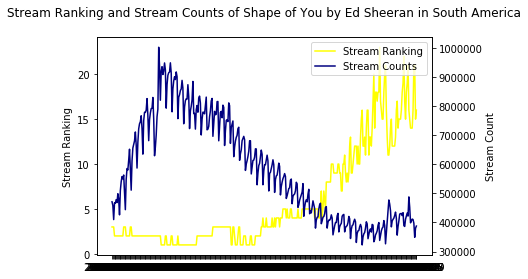

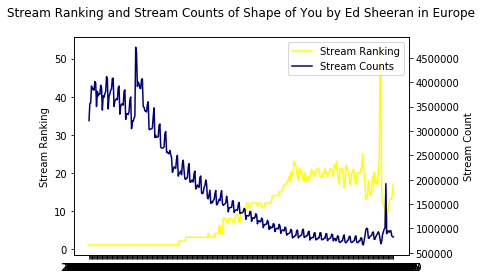

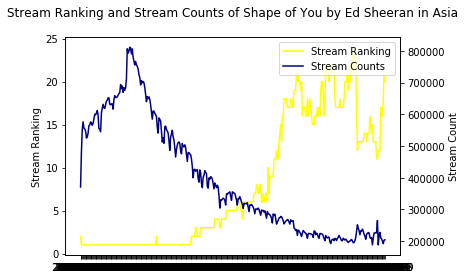

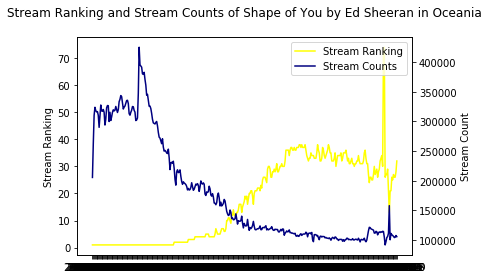

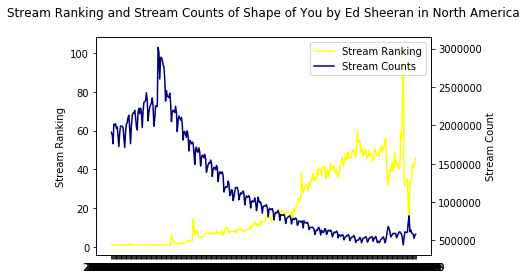

In [30]:
for cont in df_byContinent['Continent_Name'].dropna().unique():
    t=plot_cnt_n_rank(df_byContinent,'Ed Sheeran','Shape of You',cont)